In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('./train.csv', usecols=['Age', 'Fare', 'Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.fillna(df['Age'].mean(), inplace=True)

In [6]:
xTrain, xTest, yTrain, yTest = train_test_split(df.iloc[:,1:3], df['Survived'], train_size=0.1)

/var/folders/pc/9c01j4c97lj6kf65dsrjqm0w0000gn/T/ipykernel_97079/3002616215.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xTrain['Age'], kde=True)


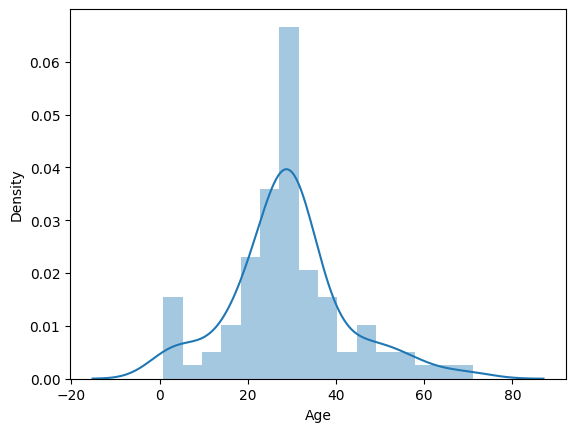

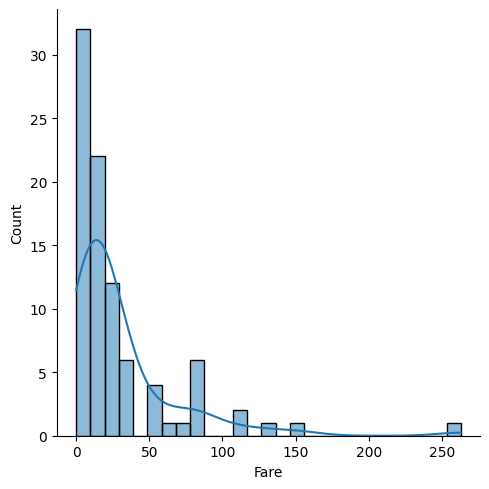

In [13]:
sns.distplot(xTrain['Age'], kde=True)
sns.displot(xTrain['Fare'], kde=True)

((array([-2.4201093 , -2.07859531, -1.88053876, -1.7368434 , -1.62203926,
         -1.52533698, -1.44110438, -1.3660116 , -1.29791819, -1.23536263,
         -1.17730022, -1.12295684, -1.07174195, -1.0231941 , -0.97694535,
         -0.9326972 , -0.89020381, -0.84926009, -0.80969288, -0.7713545 ,
         -0.73411777, -0.69787225, -0.66252125, -0.62797954, -0.59417141,
         -0.56102925, -0.52849225, -0.49650544, -0.46501882, -0.43398669,
         -0.40336704, -0.37312105, -0.34321266, -0.31360823, -0.28427618,
         -0.25518675, -0.22631171, -0.19762418, -0.1690984 , -0.14070959,
         -0.11243375, -0.08424754, -0.05612811, -0.02805301,  0.        ,
          0.02805301,  0.05612811,  0.08424754,  0.11243375,  0.14070959,
          0.1690984 ,  0.19762418,  0.22631171,  0.25518675,  0.28427618,
          0.31360823,  0.34321266,  0.37312105,  0.40336704,  0.43398669,
          0.46501882,  0.49650544,  0.52849225,  0.56102925,  0.59417141,
          0.62797954,  0.66252125,  0.

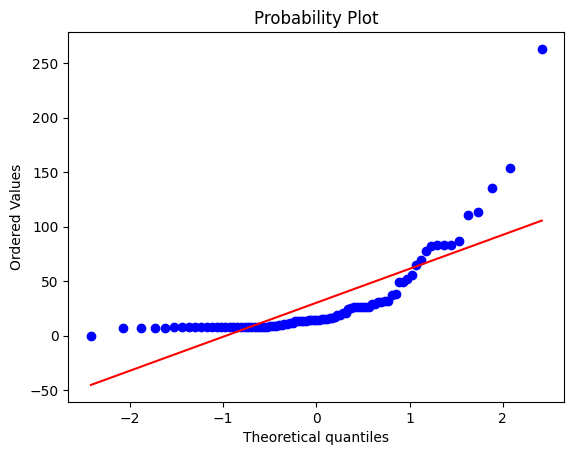

In [15]:
# stats.probplot(xTrain['Age'], plot=plt)
stats.probplot(xTrain['Fare'], plot=plt)

In [18]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [19]:
clf.fit(xTrain, yTrain)
clf2.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [22]:
print("Accuracy of Logistic Regression model is", accuracy_score(yTest, clf.predict(xTest))*100)
print("Accuracy of Decision Tree Classifier is :", accuracy_score(yTest, clf2.predict(xTest))*100)

Accuracy of Logistic Regression model is 67.83042394014963
Accuracy of Decision Tree Classifier is : 62.34413965087282


In [23]:
transformer = FunctionTransformer(func=np.log1p)

In [25]:
xTrainTransformed = transformer.fit_transform(xTrain)
xTestTransformed = transformer.transform(xTest)

In [28]:
clf.fit(xTrainTransformed,yTrain)
clf2.fit(xTrainTransformed, yTrain)

DecisionTreeClassifier()

In [31]:
clf.fit(xTrainTransformed, yTrain)

LogisticRegression()

In [34]:
predLR=clf.predict(xTestTransformed)
predDT=clf2.predict(xTestTransformed)

In [37]:
print("Accuracy of Logistic Regression after transformation is", accuracy_score(yTest, predLR)*100)
print("Accuracy of Decision Tress after transformation is", accuracy_score(yTest, predDT)*100)

Accuracy of Logistic Regression after transformation is 69.45137157107231
Accuracy of Decision Tress after transformation is 62.094763092269325


In [39]:
X = transformer.fit_transform(df.iloc[:, 1:3])
Y = df.iloc[:, 0]

In [42]:
print("LR:", np.mean(cross_val_score(clf,X, Y, scoring='accuracy', cv=10))*100)
print("DT:", np.mean(cross_val_score(clf2,X, Y, scoring='accuracy', cv=10))*100)

LR: 67.80274656679151
DT: 65.88264669163546


((array([-3.16416595e+00, -2.89636677e+00, -2.74675222e+00, -2.64114608e+00,
         -2.55870259e+00, -2.49067391e+00, -2.43252738e+00, -2.38160005e+00,
         -2.33618969e+00, -2.29513992e+00, -2.25762808e+00, -2.22304736e+00,
         -2.19093694e+00, -2.16093830e+00, -2.13276686e+00, -2.10619283e+00,
         -2.08102787e+00, -2.05711563e+00, -2.03432484e+00, -2.01254418e+00,
         -1.99167841e+00, -1.97164537e+00, -1.95237369e+00, -1.93380097e+00,
         -1.91587229e+00, -1.89853909e+00, -1.88175821e+00, -1.86549107e+00,
         -1.84970311e+00, -1.83436318e+00, -1.81944313e+00, -1.80491744e+00,
         -1.79076290e+00, -1.77695830e+00, -1.76348425e+00, -1.75032296e+00,
         -1.73745806e+00, -1.72487445e+00, -1.71255819e+00, -1.70049636e+00,
         -1.68867698e+00, -1.67708890e+00, -1.66572174e+00, -1.65456583e+00,
         -1.64361212e+00, -1.63285214e+00, -1.62227795e+00, -1.61188210e+00,
         -1.60165759e+00, -1.59159783e+00, -1.58169661e+00, -1.57194806e+00,

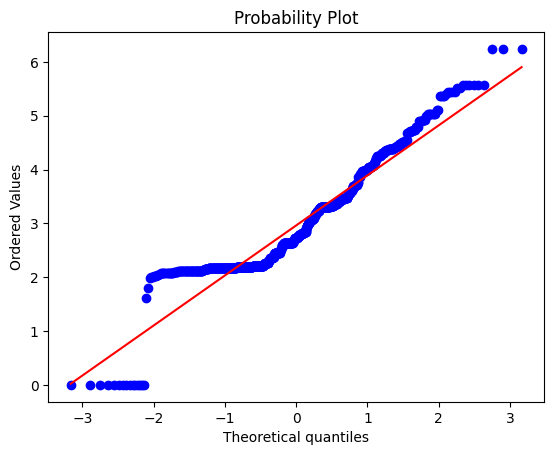

In [47]:
stats.probplot(X['Fare'], plot=plt)

((array([-3.16416595e+00, -2.89636677e+00, -2.74675222e+00, -2.64114608e+00,
         -2.55870259e+00, -2.49067391e+00, -2.43252738e+00, -2.38160005e+00,
         -2.33618969e+00, -2.29513992e+00, -2.25762808e+00, -2.22304736e+00,
         -2.19093694e+00, -2.16093830e+00, -2.13276686e+00, -2.10619283e+00,
         -2.08102787e+00, -2.05711563e+00, -2.03432484e+00, -2.01254418e+00,
         -1.99167841e+00, -1.97164537e+00, -1.95237369e+00, -1.93380097e+00,
         -1.91587229e+00, -1.89853909e+00, -1.88175821e+00, -1.86549107e+00,
         -1.84970311e+00, -1.83436318e+00, -1.81944313e+00, -1.80491744e+00,
         -1.79076290e+00, -1.77695830e+00, -1.76348425e+00, -1.75032296e+00,
         -1.73745806e+00, -1.72487445e+00, -1.71255819e+00, -1.70049636e+00,
         -1.68867698e+00, -1.67708890e+00, -1.66572174e+00, -1.65456583e+00,
         -1.64361212e+00, -1.63285214e+00, -1.62227795e+00, -1.61188210e+00,
         -1.60165759e+00, -1.59159783e+00, -1.58169661e+00, -1.57194806e+00,

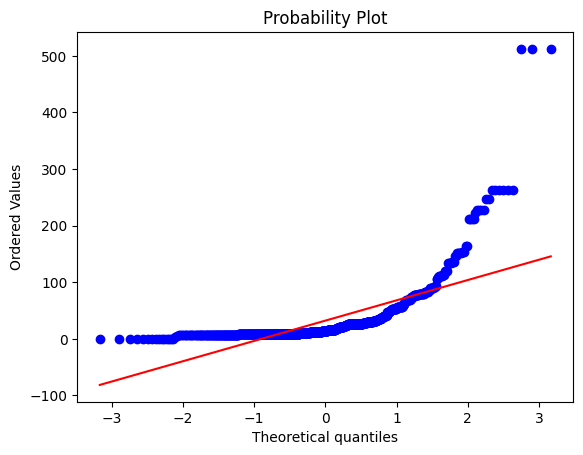

In [48]:
stats.probplot(df['Fare'], plot=plt)

((array([-3.16416595e+00, -2.89636677e+00, -2.74675222e+00, -2.64114608e+00,
         -2.55870259e+00, -2.49067391e+00, -2.43252738e+00, -2.38160005e+00,
         -2.33618969e+00, -2.29513992e+00, -2.25762808e+00, -2.22304736e+00,
         -2.19093694e+00, -2.16093830e+00, -2.13276686e+00, -2.10619283e+00,
         -2.08102787e+00, -2.05711563e+00, -2.03432484e+00, -2.01254418e+00,
         -1.99167841e+00, -1.97164537e+00, -1.95237369e+00, -1.93380097e+00,
         -1.91587229e+00, -1.89853909e+00, -1.88175821e+00, -1.86549107e+00,
         -1.84970311e+00, -1.83436318e+00, -1.81944313e+00, -1.80491744e+00,
         -1.79076290e+00, -1.77695830e+00, -1.76348425e+00, -1.75032296e+00,
         -1.73745806e+00, -1.72487445e+00, -1.71255819e+00, -1.70049636e+00,
         -1.68867698e+00, -1.67708890e+00, -1.66572174e+00, -1.65456583e+00,
         -1.64361212e+00, -1.63285214e+00, -1.62227795e+00, -1.61188210e+00,
         -1.60165759e+00, -1.59159783e+00, -1.58169661e+00, -1.57194806e+00,

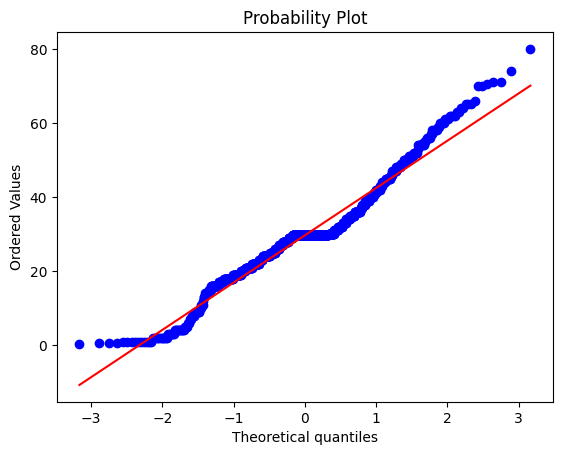

In [49]:
stats.probplot(df['Age'], plot=plt)

((array([-3.16416595e+00, -2.89636677e+00, -2.74675222e+00, -2.64114608e+00,
         -2.55870259e+00, -2.49067391e+00, -2.43252738e+00, -2.38160005e+00,
         -2.33618969e+00, -2.29513992e+00, -2.25762808e+00, -2.22304736e+00,
         -2.19093694e+00, -2.16093830e+00, -2.13276686e+00, -2.10619283e+00,
         -2.08102787e+00, -2.05711563e+00, -2.03432484e+00, -2.01254418e+00,
         -1.99167841e+00, -1.97164537e+00, -1.95237369e+00, -1.93380097e+00,
         -1.91587229e+00, -1.89853909e+00, -1.88175821e+00, -1.86549107e+00,
         -1.84970311e+00, -1.83436318e+00, -1.81944313e+00, -1.80491744e+00,
         -1.79076290e+00, -1.77695830e+00, -1.76348425e+00, -1.75032296e+00,
         -1.73745806e+00, -1.72487445e+00, -1.71255819e+00, -1.70049636e+00,
         -1.68867698e+00, -1.67708890e+00, -1.66572174e+00, -1.65456583e+00,
         -1.64361212e+00, -1.63285214e+00, -1.62227795e+00, -1.61188210e+00,
         -1.60165759e+00, -1.59159783e+00, -1.58169661e+00, -1.57194806e+00,

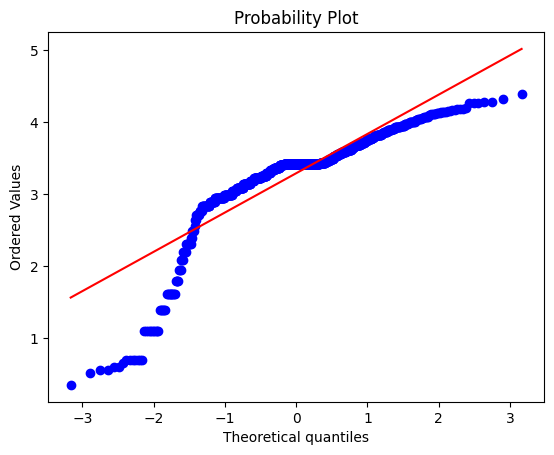

In [50]:
stats.probplot(X['Age'], plot=plt)

We see that after transformation, the 'Age' column is more distrubed as compared to before, so we will only transform the 'Fare' column, as it was normalised using log transformation

In [51]:
cTransformer = ColumnTransformer(
    [
        ('t1', FunctionTransformer(func=np.log1p),['Fare'])
    ],
    remainder='passthrough'
)

In [52]:
xTrainNew = cTransformer.fit_transform(xTrain)
xTestNew = cTransformer.transform(xTest)

In [53]:
clf.fit(xTrainNew, yTrain)
clf2.fit(xTrainNew, yTrain)

DecisionTreeClassifier()

In [60]:
print("Accuracy of Logistic Regression is: ", accuracy_score(yTest, clf.predict(xTestNew))*100)
print("Accuracy of Decision tree algorithm is: ", accuracy_score(yTest, clf2.predict(xTestNew))*100)

Accuracy of Logistic Regression is:  68.5785536159601
Accuracy of Decision tree algorithm is:  61.720698254364095
